In [2]:
import re
import nltk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import stopwords

In [3]:
dftwitter = pd.read_csv(r"C:\Users\ABRAHAM\Downloads\twitter_validation.csv", encoding='ISO-8859-1', header = None)

In [4]:
dftwitter

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
dftwitter.columns = ["Id","Location", "Target", "Text"]

In [6]:
dftwitter.head()

,Id,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
dftwitter.sample(10)

,Id,Location,Target,Text
978,10128,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,How Abhijeet Bhayya ur efforts are incredible ...
76,9857,PlayStation5(PS5),Positive,oooooh shit i think my motherboard is already ...
987,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
159,11977,Verizon,Positive,"Exciting news! Verizon, Ericsson and Qualcomm ..."
680,9940,PlayStation5(PS5),Neutral,Watch The New PlayStation 5 Demonâs SoulsÂ T...
723,11155,TomClancysGhostRecon,Neutral,I'm getting some Resident Evil vibes from my c...
577,813,AssassinsCreed,Neutral,ð¥ ð¥ We're gonna try to save some histo...
134,7458,LeagueOfLegends,Positive,Nothing like getting two leavers in the game t...
774,3558,Facebook,Neutral,Update: Chase emailed me from an anonymous ema...
509,586,ApexLegends,Positive,It was a good day in #ApexLegends #XboxShare p...


In [8]:
dftwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        1000 non-null   int64 
 1   Location  1000 non-null   object
 2   Target    1000 non-null   object
 3   Text      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
dftwitter.isna().sum()

Id          0
Location    0
Target      0
Text        0
dtype: int64

In [10]:
dftwitter.shape

(1000, 4)

In [11]:
dftwitter.Target.value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

In [12]:
#plt.(dftwitter['Target'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

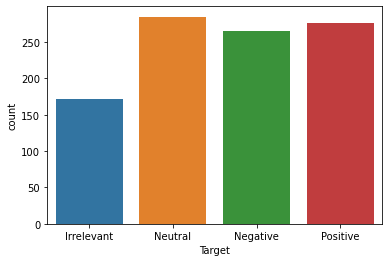

In [13]:
sns.countplot(dftwitter['Target'])

In [14]:
dftwitter.drop(dftwitter.index[(dftwitter['Target']=='Irrelevant')],inplace = True, axis =0)

In [15]:
dftwitter.size

3312

In [16]:
dftwitter.reset_index(drop = True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

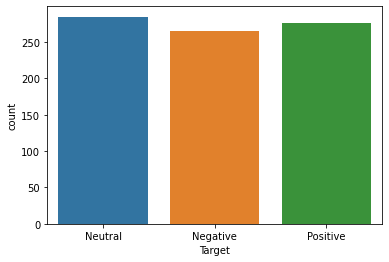

In [17]:
sns.countplot(dftwitter['Target'])

In [18]:
dftwitter.drop(["Id","Location"], axis =1, inplace = True)

In [19]:
dftwitter

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [20]:
sentiment_map = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}

# Map the values in 'sentiment' column using the mapping dictionary
dftwitter['Target'] = dftwitter['Target'].map(sentiment_map)

dftwitter

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [21]:
dftwitter.dtypes

Target     int64
Text      object
dtype: object

In [22]:
X = dftwitter['Text']

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABRAHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABRAHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
from nltk.tokenize import TweetTokenizer

In [26]:
objTocken = TweetTokenizer()

In [27]:
objTocken

In [28]:
#X.apply( lambda x: objTocken.tokenize(x))

In [29]:
#Y = X.apply(lambda x: objTocken.tokenize(x)).apply(lambda x: " ".join(x))

In [30]:
#X=X.apply(lambda x:tk.TweetTokenizer(x)).apply(lambda x:" ".join(x))
X=X.apply(lambda x:objTocken.tokenize(x)).apply(lambda x:" ".join(x))

In [31]:
X

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [37]:
X = X.str.replace('[^a-zA-Z-0-9]+-@',' ')

C:\Users\ABRAHAM\AppData\Local\Temp\ipykernel_9860\3169187002.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace('[^a-zA-Z-0-9]+-@',' ')


In [38]:
X

0      BBC News  Amazon boss Jeff Bezos rejects claim...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [39]:
from nltk.stem import SnowballStemmer

In [322]:
objStemmer =  SnowballStemmer(language= 'english')

In [323]:
X=X.apply(lambda x:[objStemmer.stem (i.lower()) for i in objTocken.tokenize(x)]).apply(lambda x:" ".join(x))

In [324]:
X

0      bbc news amazon boss jeff bezo reject claim co...
1      @microsoft whi do i pay for word when it funct...
2      csgo matchmak is so full of closet hack , it a...
3      now the presid is slap american in the face th...
4      hi @eahelp iâ   ve had madelein mccann in my...
                             ...                        
823    pleas explain how this is possibl ! how can th...
824    good on soni . as much as i want to see the ne...
825    today suck so itâ   s time to drink wine n p...
826    bought a fraction of microsoft today . small w...
827    johnson & johnson to stop sell talc babi powde...
Name: Text, Length: 828, dtype: object

In [325]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABRAHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [326]:

# nltk.cor

In [327]:
varStop = stopwords.words('english')

In [328]:
varStop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [329]:
#for i in objTocken.tokenize(X):
 #   if i not in varStop:
X =  X.apply(lambda x: [i for i in objTocken.tokenize(x) if i not in varStop] ).apply(lambda x:" ".join(x))
        

In [330]:
X

0      bbc news amazon boss jeff bezo reject claim co...
1      @microsoft whi pay word function poor @samsung...
2       csgo matchmak full closet hack , truli aw game .
3      presid slap american face realli commit unlaw ...
4      hi @eahelp iâ   madelein mccann cellar past ...
                             ...                        
823    pleas explain possibl ! let compani overcharg ...
824    good soni . much want see new ps5 , go right m...
825    today suck itâ   time drink wine n play bord...
826        bought fraction microsoft today . small win .
827    johnson & johnson stop sell talc babi powder u...
Name: Text, Length: 828, dtype: object

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [332]:
objTfid = TfidfVectorizer()

In [333]:
varX = objTfid.fit_transform(X)

In [334]:
print(varX)

  (0, 671)	0.24313585019257306
  (0, 439)	0.24313585019257306
  (0, 3697)	0.2114323049292964
  (0, 821)	0.11682352947654759
  (0, 1008)	0.24313585019257306
  (0, 1146)	0.22910680792419394
  (0, 2090)	0.1237667105601158
  (0, 245)	0.2114323049292964
  (0, 851)	0.16524143420085138
  (0, 793)	0.19979040742615584
  (0, 2937)	0.24313585019257306
  (0, 537)	0.24313585019257306
  (0, 1913)	0.22910680792419394
  (0, 607)	0.21915304402793215
  (0, 319)	0.14218134606559862
  (0, 2407)	0.36830355681521143
  (0, 504)	0.4582136158483879
  (1, 783)	0.4052090854499021
  (1, 3077)	0.4052090854499021
  (1, 2714)	0.3818283483730563
  (1, 1441)	0.4052090854499021
  (1, 3926)	0.36523945141691455
  (1, 2606)	0.31240246924634235
  (1, 3883)	0.26191944627409375
  (1, 2257)	0.24905209813650908
  :	:
  (825, 603)	0.2251053994296016
  (825, 1000)	0.2251053994296016
  (825, 3597)	0.21143109955979203
  (825, 1894)	0.23256374689752723
  (825, 3434)	0.2823645460073434
  (825, 2674)	0.16727034067939098
  (826, 1415)

In [335]:
Y = dftwitter['Target']

In [412]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(varX, Y, test_size=0.25, random_state=0)

In [413]:
x_train

<621x4052 sparse matrix of type '<class 'numpy.float64'>'
	with 8328 stored elements in Compressed Sparse Row format>

In [414]:
from sklearn.linear_model import LogisticRegression

In [415]:
logisticRegr = LogisticRegression()

In [416]:
logisticRegr.fit(x_train, y_train)


LogisticRegression()

In [417]:
logisticRegr.predict(x_test)

array([ 1,  1, -1,  0,  0,  1, -1, -1,  0,  1,  0, -1,  1, -1,  1,  0, -1,
        0,  0,  0,  0,  1,  1,  1,  1,  1, -1,  0, -1, -1,  1,  1, -1, -1,
       -1,  0, -1,  0, -1, -1,  1,  1,  1,  1, -1,  0, -1,  0, -1, -1,  1,
        0, -1,  1,  1, -1,  1, -1,  1,  0,  1,  1, -1, -1,  0,  1,  0,  0,
        0, -1,  0, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0,  1,  1,  0,  0,
        1,  0,  0,  0, -1,  0,  1,  0,  0, -1,  1,  0,  1, -1, -1,  1,  0,
       -1,  1, -1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1, -1, -1,  1, -1,
        0,  1,  0,  0,  0,  0,  1,  1,  0, -1,  1,  0,  1,  1,  0,  0, -1,
        0,  0,  0,  0,  1, -1,  1,  0, -1,  1,  0,  1, -1, -1, -1, -1,  0,
        1, -1,  1,  0,  1, -1,  0, -1, -1, -1,  1,  1,  1,  0, -1,  1,  0,
        1,  1,  0, -1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  1, -1, -1, -1,
        0,  1, -1,  1,  1,  0,  1, -1,  0,  1,  0,  0,  1,  0, -1,  0,  0,
       -1,  1,  0], dtype=int64)

In [418]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.6183574879227053


In [419]:
from sklearn.tree import DecisionTreeClassifier

In [420]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 1,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [421]:
train_using_gini(x_train, x_test, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

In [422]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [423]:
y_pred =prediction(x_test, train_using_gini(x_train, x_test, y_train))

Predicted values:
[-1 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1  1 -1 -1 -1  0 -1  0 -1  0  0
 -1 -1 -1  0  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1
  0  0 -1 -1 -1 -1 -1  0  0 -1  0 -1  0  0 -1  0 -1 -1  0  0  0 -1 -1 -1
 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1  0
  0  0 -1  0  0 -1 -1 -1 -1  0  0 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0 -1
  0 -1  0  1 -1  0 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1  0 -1  1 -1 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1
  0 -1 -1  0  0 -1  0 -1 -1 -1  0  0 -1 -1  0]


In [424]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [425]:
confusion_matrix(y_test, y_pred)

array([[56,  7,  1],
       [37, 32,  0],
       [47, 23,  4]], dtype=int64)

In [426]:
 accuracy_score(y_test,y_pred)*100

44.44444444444444

In [427]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [428]:
# fitting x samples and y classes 
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [429]:
y_predsvc = clf.predict(x_test)

In [430]:
accuracy_score(y_test,y_predsvc)*100

58.93719806763285